In [138]:
import pickle
import pandas as pd
from collections import defaultdict
import re
import numpy as np
import os
import matplotlib.pyplot as plt

In [139]:
!ls -lhrt ../data/intermediate | grep scraped_financials32_ |tail -n 10

-rw-r--r--  1 navy  staff    98K Sep  9 10:49 scraped_financials32_1631177347889046000.csv
-rw-r--r--  1 navy  staff   100K Sep  9 10:51 scraped_financials32_1631177497468295000.csv
-rw-r--r--  1 navy  staff   100K Sep  9 10:53 scraped_financials32_1631177630253111000.csv
-rw-r--r--  1 navy  staff   114K Sep  9 10:58 scraped_financials32_1631177886342421000.csv
-rw-r--r--  1 navy  staff    13K Sep  9 11:07 scraped_financials32_1631178445516167000.csv
-rw-r--r--  1 navy  staff    28K Sep  9 11:12 scraped_financials32_1631178766753764000.csv
-rw-r--r--  1 navy  staff    52K Sep  9 11:20 scraped_financials32_1631179217769081000.csv
-rw-r--r--  1 navy  staff    73K Sep  9 11:26 scraped_financials32_1631179610576846000.csv
-rw-r--r--  1 navy  staff    91K Sep  9 11:33 scraped_financials32_1631179986927939000.csv
-rw-r--r--  1 navy  staff   118K Sep  9 11:40 scraped_financials32_1631180444363533000.csv


In [141]:
files = [
    'scraped_financials2.csv',
    'scraped_financials.csv',
    'scraped_financials31.csv',
    'scraped_financials32.csv',
    'scraped_financials33.csv',
    'scraped_financials34.csv',
]

dfs = [pd.read_csv(os.path.join('../data/intermediate', file), index_col=0) for file in files]

companies = pd.concat(dfs).reset_index(drop=True)

In [142]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_current_assets       2816 non-null   float64
 1   total_current_liabilities  2777 non-null   float64
 2   CIK                        5846 non-null   int64  
 3   date_filled                5846 non-null   object 
 4   url                        5846 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 228.5+ KB


In [143]:
companies.head()

,total_current_assets,total_current_liabilities,CIK,date_filled,url
0,486380.0,185896.0,816159,2016-12-31,https://www.sec.gov/Archives/edgar/data/0000816159/000157104917001894/t1700128_10k.htm
1,473359.0,149664.0,816159,2015-12-31,https://www.sec.gov/Archives/edgar/data/0000816159/000157104916012144/t1600089_10k.htm
2,399841.0,180267.0,816159,2014-12-31,https://www.sec.gov/Archives/edgar/data/0000816159/000157104915001464/t81389_10k.htm
3,340550.0,162318.0,816159,2013-12-31,https://www.sec.gov/Archives/edgar/data/0000816159/000118811214000551/t78398_10k.htm
4,306805.0,143452.0,816159,2012-12-31,https://www.sec.gov/Archives/edgar/data/0000816159/000114036113009925/form10k.htm


In [144]:
len(companies['CIK'].unique())

482

In [145]:
# FIXME some companies have duplicate entries for date_filled. Amendments?
print(companies.shape)
companies.drop_duplicates(subset=['CIK', 'date_filled'], inplace=True)
companies.shape

(5846, 5)


(5528, 5)

In [146]:
companies['date_filled'] = pd.to_datetime(companies['date_filled'])
companies['CIK'] = companies['CIK'].astype('category')
companies['current_ratio'] = companies['total_current_assets'] / companies['total_current_liabilities']

In [147]:
pd.set_option('max_colwidth', 400)

def get_fiscal_year(dt):
    if dt.month < 6:
        return dt.year - 1
    else:
        return dt.year

companies['fiscal_year'] = companies['date_filled'].apply(lambda x: get_fiscal_year(x))
companies[['total_current_assets', 'total_current_liabilities', 'url', 'fiscal_year']].head()

,total_current_assets,total_current_liabilities,url,fiscal_year
0,486380.0,185896.0,https://www.sec.gov/Archives/edgar/data/0000816159/000157104917001894/t1700128_10k.htm,2016
1,473359.0,149664.0,https://www.sec.gov/Archives/edgar/data/0000816159/000157104916012144/t1600089_10k.htm,2015
2,399841.0,180267.0,https://www.sec.gov/Archives/edgar/data/0000816159/000157104915001464/t81389_10k.htm,2014
3,340550.0,162318.0,https://www.sec.gov/Archives/edgar/data/0000816159/000118811214000551/t78398_10k.htm,2013
4,306805.0,143452.0,https://www.sec.gov/Archives/edgar/data/0000816159/000114036113009925/form10k.htm,2012


In [148]:
# save processed company dataset
companies.to_csv('../data/processed/scraped_companies.csv')

In [129]:
companies['fiscal_year'].sort_values(ascending=True).unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

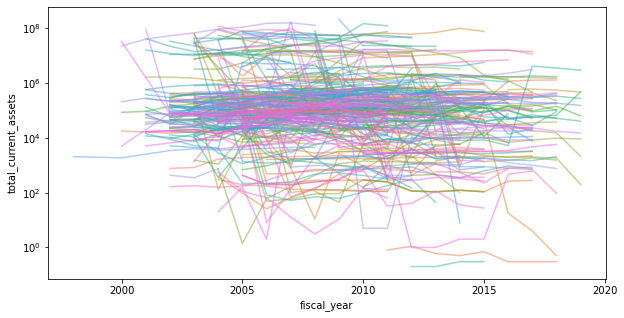

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=companies, x='fiscal_year', y='total_current_assets', hue='CIK', ax=ax, legend=False, alpha=.5)
ax.set(yscale='log')
plt.show()

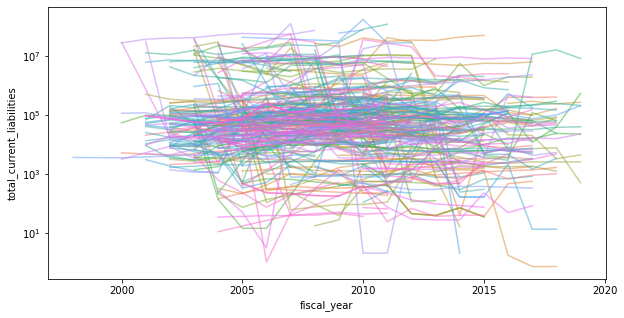

In [131]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=companies, x='fiscal_year', y='total_current_liabilities', hue='CIK', ax=ax, legend=False, alpha=.5)
ax.set(yscale='log')
plt.show()

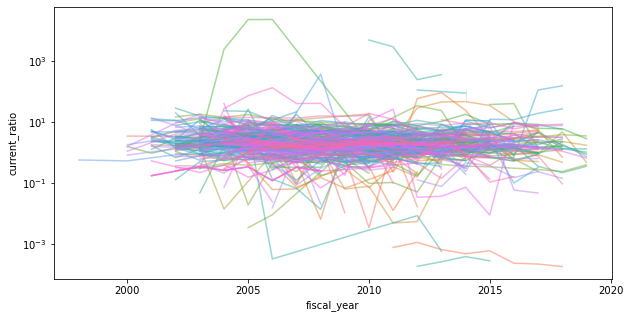

In [132]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(data=companies, x='fiscal_year', y='current_ratio', hue='CIK', legend=False, alpha=.5)
ax.set(yscale='log')
plt.show()

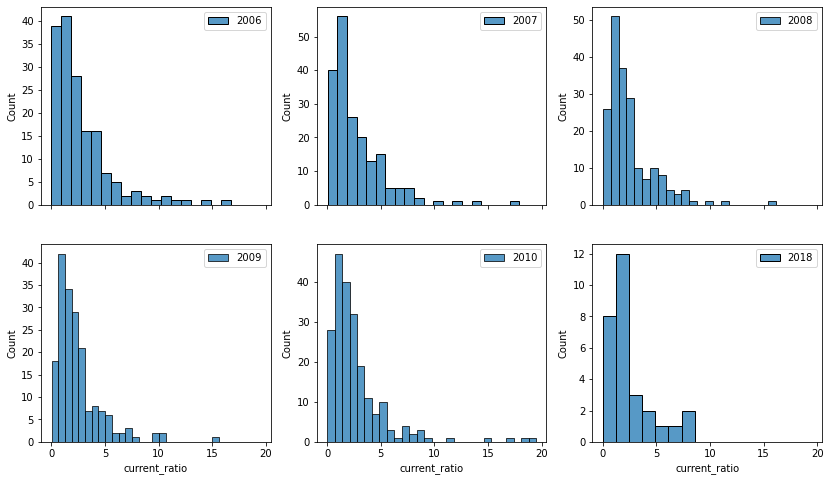

In [133]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharex=True)
years = [2006, 2007, 2008, 2009, 2010, 2018]
for year, ax in zip(years, axes.ravel()):
    df = companies[(companies['fiscal_year'] == year) & (companies['current_ratio'] <= 20)]
    sns.histplot(data=df, x='current_ratio', ax=ax, label=f'{year}')
    ax.legend()

<AxesSubplot:xlabel='fiscal_year', ylabel='current_ratio'>

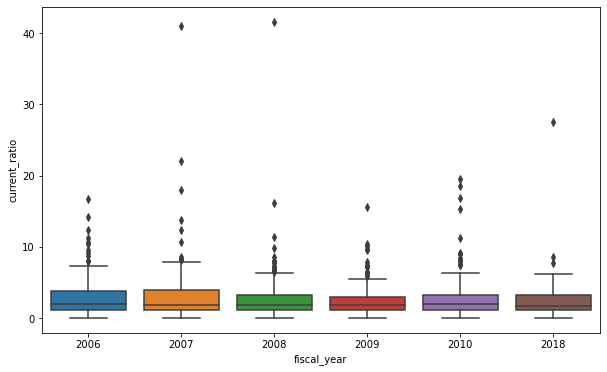

In [134]:
companies_yearsubset = companies[(companies['fiscal_year'].isin(years)) & (companies['current_ratio'] < 100)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=companies_yearsubset, x='fiscal_year', y='current_ratio', ax=ax)

<AxesSubplot:xlabel='fiscal_year'>

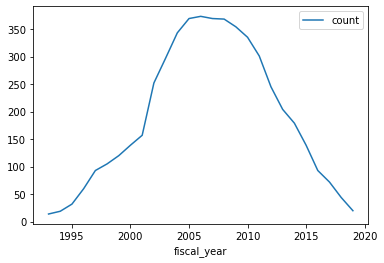

In [135]:
companies.groupby('fiscal_year').agg(count=('CIK', 'count')).plot()

<AxesSubplot:>

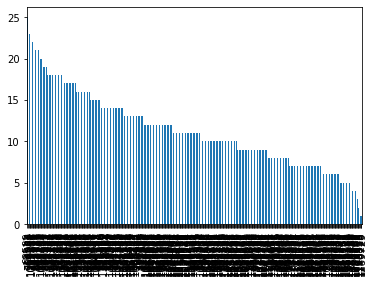

In [137]:
companies['CIK'].value_counts().plot.bar()

In [151]:
# merge with company survival dataset to get company names

fillings = pd.read_csv("../data/intermediate/companies_filling_minimal.csv", index_col=0)
fillings.head()

,Company Name,CIK,most_recent_filling
0,1 800 CONTACTS INC,1050122,2008-02-13
1,1ST STATE BANCORP INC,1074078,2008-02-13
2,24/7 REAL MEDIA INC,1062195,2007-07-12
3,3CI COMPLETE COMPLIANCE CORP,883787,2006-04-26
4,3COM CORP,738076,2011-02-14


In [180]:
companies_merged = pd.merge(fillings, companies, on='CIK', validate='one_to_many').reset_index()
companies_merged.head()

,index,Company Name,CIK,most_recent_filling,total_current_assets,total_current_liabilities,date_filled,url,current_ratio,fiscal_year
0,0,3COM CORP,738076,2011-02-14,224991.0,180273.0,2009-05-29,https://www.sec.gov/Archives/edgar/data/0000738076/000095012309025431/b76396cce10vk.htm,1.248057,2008
1,1,3COM CORP,738076,2011-02-14,809905.0,504461.0,2008-05-30,https://www.sec.gov/Archives/edgar/data/0000738076/000095013508005146/b711153ce10vk.htm,1.605486,2007
2,2,3COM CORP,738076,2011-02-14,897682.0,640068.0,2007-06-01,https://www.sec.gov/Archives/edgar/data/0000738076/000095013507004539/b659553ce10vk.htm,1.402479,2007
3,3,3COM CORP,738076,2011-02-14,1249345.0,471281.0,2006-06-02,https://www.sec.gov/Archives/edgar/data/0000738076/000095013506004986/b61877cce10vk.htm,2.650956,2006
4,4,3COM CORP,738076,2011-02-14,977509.0,309560.0,2005-06-03,https://www.sec.gov/Archives/edgar/data/0000738076/000073807605000011/edgar.htm,3.157737,2005


In [181]:
companies_merged['date_filled'] = pd.to_datetime(companies_merged['date_filled'])
companies_merged['most_recent_filling'] = pd.to_datetime(companies_merged['most_recent_filling'])
companies_merged['CIK'] = companies_merged['CIK'].astype('category')

In [182]:
def get_fiscal_year(dt):
    if dt.month < 6:
        return dt.year - 1
    else:
        return dt.year

In [223]:
companies_merged.groupby('CIK').max().head()

,index,Company Name,most_recent_filling,total_current_assets,total_current_liabilities,date_filled,url,current_ratio,fiscal_year,most_recent_10k_filling
CIK,,,,,,,,,,
4611,1324,AMERICAN BILTRITE INC,2017-02-09,149368.0,132555.0,2011-12-31,https://www.sec.gov/Archives/edgar/data/0000004611/000117152012000278/eps4447.htm,2.102297,2011,2011-12-31
4828,1344,AMERICAN CRYSTAL SUGAR CO /MN/,2013-07-23,391401.0,320552.0,2012-08-31,https://www.sec.gov/Archives/edgar/data/0000004828/000110465912075840/a12-16504_110k.htm,1.414146,2012,2012-08-31
5133,1402,AMERICAN GREETINGS CORP,2017-02-22,1281639.0,584040.0,2016-02-29,https://www.sec.gov/Archives/edgar/data/0000005133/000119312516604228/d170085d10k.htm,2.628103,2015,2016-02-29
5768,1463,AMERICAN SCIENCE & ENGINEERING INC,2016-10-07,302034.0,73096.0,2016-03-31,https://www.sec.gov/Archives/edgar/data/0000005768/000110465916122964/a16-10618_110k.htm,5.072200,2015,2016-03-31
6284,1614,ANALOGIC CORP,2019-02-13,408795.0,99939.0,2017-07-31,https://www.sec.gov/Archives/edgar/data/0000006284/000156459017018981/alog-10k_20170731.htm,5.593957,2017,2017-07-31


<AxesSubplot:>

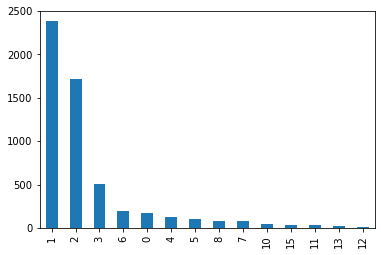

In [222]:
tmp_dict = c[['date_filled']].to_dict()['date_filled']
companies_merged['most_recent_10k_filling'] = companies_merged['CIK'].apply(lambda x: tmp_dict[x])
(companies_merged['most_recent_filling'].dt.year - companies_merged['most_recent_10k_filling'].dt.year).value_counts().plot.bar()

In [171]:
print(companies_merged.shape)
print(companies.shape)

(5528, 10)
(5528, 7)


In [224]:
# save merged dataset
companies_merged.to_csv('../data/processed/scraped_companies_merged_survival.csv')